In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime
from  matplotlib import pyplot as plt
%matplotlib inline

In [171]:
import pandas as pd
pd.options.display.float_format='{:.4g}'.format

import numpy as np
RANDOM_SEED = 1234567890

import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#from sklearn.linear_model import ElasticNet 
#from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as lm


from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
pd.set_option("display.max_rows", 2000)

In [4]:
def dollar_val(strng, mylocale='en_US.UTF-8'):
    '''Function to convert formatted string in database to float of dollar amounts
    Generalized to any locale for possible reutilization in the future
    '''
    import locale
    locale.setlocale(locale.LC_ALL, mylocale)
    locale._override_localeconv = {'n_sign_posn':0}
    conv = locale.localeconv()
    if type(strng) == str:
        raw_numbers = strng.replace(conv['currency_symbol'], '')
    else:
        raw_numbers = strng
    return locale.atof(raw_numbers)

In [5]:
def to_2017(dollars, date):
    import pandas as pd
    cpi = {  '2004-01-01': 186.3,
             '2004-02-01': 186.7,
             '2004-03-01': 187.1,
             '2004-04-01': 187.4,
             '2004-05-01': 188.2,
             '2004-06-01': 188.9,
             '2004-07-01': 189.1,
             '2004-08-01': 189.2,
             '2004-09-01': 189.8,
             '2004-10-01': 190.8,
             '2004-11-01': 191.7,
             '2004-12-01': 191.7,
             '2005-01-01': 191.6,
             '2005-02-01': 192.4,
             '2005-03-01': 193.1,
             '2005-04-01': 193.7,
             '2005-05-01': 193.6,
             '2005-06-01': 193.7,
             '2005-07-01': 194.9,
             '2005-08-01': 196.1,
             '2005-09-01': 198.8,
             '2005-10-01': 199.1,
             '2005-11-01': 198.1,
             '2005-12-01': 198.1,
             '2006-01-01': 199.3,
             '2006-02-01': 199.4,
             '2006-03-01': 199.7,
             '2006-04-01': 200.7,
             '2006-05-01': 201.3,
             '2006-06-01': 201.8,
             '2006-07-01': 202.9,
             '2006-08-01': 203.8,
             '2006-09-01': 202.8,
             '2006-10-01': 201.9,
             '2006-11-01': 202.0,
             '2006-12-01': 203.1,
             '2007-01-01': 203.437,
             '2007-02-01': 204.226,
             '2007-03-01': 205.288,
             '2007-04-01': 205.904,
             '2007-05-01': 206.755,
             '2007-06-01': 207.234,
             '2007-07-01': 207.603,
             '2007-08-01': 207.667,
             '2007-09-01': 208.547,
             '2007-10-01': 209.19,
             '2007-11-01': 210.834,
             '2007-12-01': 211.445,
             '2008-01-01': 212.174,
             '2008-02-01': 212.687,
             '2008-03-01': 213.448,
             '2008-04-01': 213.942,
             '2008-05-01': 215.208,
             '2008-06-01': 217.463,
             '2008-07-01': 219.016,
             '2008-08-01': 218.69,
             '2008-09-01': 218.877,
             '2008-10-01': 216.995,
             '2008-11-01': 213.153,
             '2008-12-01': 211.398,
             '2009-01-01': 211.933,
             '2009-02-01': 212.705,
             '2009-03-01': 212.495,
             '2009-04-01': 212.709,
             '2009-05-01': 213.022,
             '2009-06-01': 214.79,
             '2009-07-01': 214.726,
             '2009-08-01': 215.445,
             '2009-09-01': 215.861,
             '2009-10-01': 216.509,
             '2009-11-01': 217.234,
             '2009-12-01': 217.347,
             '2010-01-01': 217.488,
             '2010-02-01': 217.281,
             '2010-03-01': 217.353,
             '2010-04-01': 217.403,
             '2010-05-01': 217.29,
             '2010-06-01': 217.199,
             '2010-07-01': 217.605,
             '2010-08-01': 217.923,
             '2010-09-01': 218.275,
             '2010-10-01': 219.035,
             '2010-11-01': 219.59,
             '2010-12-01': 220.472,
             '2011-01-01': 221.187,
             '2011-02-01': 221.898,
             '2011-03-01': 223.046,
             '2011-04-01': 224.093,
             '2011-05-01': 224.806,
             '2011-06-01': 224.806,
             '2011-07-01': 225.395,
             '2011-08-01': 226.106,
             '2011-09-01': 226.597,
             '2011-10-01': 226.75,
             '2011-11-01': 227.169,
             '2011-12-01': 227.223,
             '2012-01-01': 227.842,
             '2012-02-01': 228.329,
             '2012-03-01': 228.807,
             '2012-04-01': 229.187,
             '2012-05-01': 228.713,
             '2012-06-01': 228.524,
             '2012-07-01': 228.59,
             '2012-08-01': 229.918,
             '2012-09-01': 231.015,
             '2012-10-01': 231.638,
             '2012-11-01': 231.249,
             '2012-12-01': 231.221,
             '2013-01-01': 231.679,
             '2013-02-01': 232.937,
             '2013-03-01': 232.282,
             '2013-04-01': 231.797,
             '2013-05-01': 231.893,
             '2013-06-01': 232.445,
             '2013-07-01': 232.9,
             '2013-08-01': 233.456,
             '2013-09-01': 233.544,
             '2013-10-01': 233.669,
             '2013-11-01': 234.1,
             '2013-12-01': 234.719,
             '2014-01-01': 235.347,
             '2014-02-01': 235.522,
             '2014-03-01': 235.956,
             '2014-04-01': 236.463,
             '2014-05-01': 236.867,
             '2014-06-01': 237.188,
             '2014-07-01': 237.485,
             '2014-08-01': 237.439,
             '2014-09-01': 237.452,
             '2014-10-01': 237.447,
             '2014-11-01': 237.042,
             '2014-12-01': 236.27,
             '2015-01-01': 234.836,
             '2015-02-01': 235.274,
             '2015-03-01': 235.956,
             '2015-04-01': 236.165,
             '2015-05-01': 236.952,
             '2015-06-01': 237.618,
             '2015-07-01': 237.993,
             '2015-08-01': 237.989,
             '2015-09-01': 237.467,
             '2015-10-01': 237.764,
             '2015-11-01': 238.072,
             '2015-12-01': 237.827,
             '2016-01-01': 237.99,
             '2016-02-01': 237.532,
             '2016-03-01': 238.022,
             '2016-04-01': 238.843,
             '2016-05-01': 239.439,
             '2016-06-01': 240.074,
             '2016-07-01': 240.058,
             '2016-08-01': 240.569,
             '2016-09-01': 241.017,
             '2016-10-01': 241.667,
             '2016-11-01': 242.081,
             '2016-12-01': 242.784,
             '2017-01-01': 244.028,
             '2017-02-01': 244.102,
             '2017-03-01': 243.717,
             '2017-04-01': 244.087,
             '2017-05-01': 243.911,
             '2017-06-01': 244.032,
             '2017-07-01': 244.236,
             '2017-08-01': 245.262,
             '2017-09-01': 246.392,
             '2017-10-01': 246.583,
             '2017-11-01': 247.411,
             '2017-12-01': 247.91}

    cpi_dec_2017 = cpi['2017-12-01']
    cpi_source = cpi[date]
    return dollars * cpi_dec_2017 / cpi_source


In [145]:
# First we load the relevant datafiles
bid = pd.read_csv('../data/bidding_info.csv', low_memory=False)
change_orders = pd.read_csv('../data/change_orders.csv', low_memory=False)


# Drop the records wirh Awarded column == NaN from bid
bid = bid[bid['Awarded'].notnull()]
# And the records with the Bid Total NaN
bid = bid[bid['Bid Total'].notnull()]

# create a list of sucessful bids (someone won) 
# otherwise there is no actual
# 
# and drop unsuccesful bids from tables
successful_bids = bid[bid['Awarded'] == 1]['Proposal Number']
bid = bid[bid['Proposal Number'].isin(successful_bids)]
change_orders = change_orders[change_orders['CONT_ID'].isin(successful_bids)]


# Convert dollar amounts from strings to float
# first for bid
columns_to_convert = ['Bid Total', 'Engineers Estimate', 'Difference']
for col in columns_to_convert:
    tmp = bid[col]
    bid[col] = tmp.map(dollar_val, na_action='ignore')
# Next for change_orders
columns_to_convert = ['C_O_AMT']
for col in columns_to_convert:
    tmp = change_orders[col]
    change_orders[col] = tmp.map(dollar_val, na_action='ignore')

# We add date columns to adjust for inflation
bid['month'] = pd.to_datetime(bid['Letting Date']).dt.month
bid['year'] = pd.to_datetime(bid['Letting Date']).dt.year
bid['date'] = bid.apply(lambda x:pd.Timestamp.strptime(
                       "{0} {1}".format(x['year'],x['month']),
                        "%Y %m"),axis=1)

change_orders['date'] = change_orders.apply(lambda 
                        x:pd.Timestamp.strptime("{0}".format(x['APPR_DT']//100),
                         "%Y%m"),axis=1)


# Convert all the money columns to 2017 dollars
# so we can compae apples to apples
bid['Bid Total 2017'] = np.vectorize(to_2017)(bid['Bid Total'], bid['date'].astype(str))
bid['Engineers Estimate 2017'] = np.vectorize(to_2017)(bid['Engineers Estimate'], bid['date'].astype(str))
change_orders['C_O_AM_2017'] = np.vectorize(to_2017)(change_orders['C_O_AMT'], change_orders['date'].astype(str))

# Dropping unnecessary columns 
cols_to_drop = ['Vendor Number', 'Vendor Name', 'Difference','Bid Total',
                'Engineers Estimate', 'Percentage Bid Total Over Estimate', 
                'Letting Date','month', 'year']
bid = bid.drop(cols_to_drop, axis=1)
cols_to_drop = ['Vendor', 'Bid Amount', 'LEV2_OFFICE_NBR', 'DESC1','C_O_AMT',
                'C_O_NBR', 'CD_DESC', 'APPR_DT', 'CHNG_DESC', 'C_O_T']
change_orders = change_orders.drop(cols_to_drop, axis=1)

# Aggregate changes per contract
ch_o_total = change_orders.groupby('CONT_ID').sum()
ch_o_total.reset_index(inplace=True)
ch_o_total.columns = ['Proposal Number', 'C_O_AM_2017']

# Merge with bid
bid = pd.merge(bid,ch_o_total, on='Proposal Number', how='outer' ).sort_values(by=['Proposal Number', 'Awarded'])
# no reported changes is assumed as the bid total was correct and is the actual expense
bid.fillna(0, inplace=True)
bid['Final cost 2017'] = bid['Bid Total 2017'] + bid['C_O_AM_2017']



# Feature Engineering
#
# Split into winner and loser groupby objects

#def features(df):
'''
Function to compute some statistics about winners and losers 
of the bids

INPUT: dataframe with ['Proposal Number', 'Awarded', 'date', 'Bid Total 2017',
                       'Engineers Estimate 2017', 'C_O_AM_2017']
OUTPUT
'''
g_loser = bid[bid['Awarded'] == 0].groupby('Proposal Number')
bid = bid[bid['Awarded'] == 1]

# Make dataframe
loser = pd.DataFrame(g_loser.agg(['size', 'mean', 'min', 'max']))
loser.columns = [' '.join(col) for col in loser.columns]
loser.reset_index(inplace=True)

# Dropping unnecessary columns 
cols_to_drop = ['Awarded mean', 'Awarded min', 'Awarded max', 
                'Bid Total 2017 size', 'Engineers Estimate 2017 size', 
                'Engineers Estimate 2017 mean', 'Engineers Estimate 2017 min', 
                'Engineers Estimate 2017 max', 'C_O_AM_2017 size', 'C_O_AM_2017 mean', 
                'C_O_AM_2017 min', 'C_O_AM_2017 max', 'Final cost 2017 size', 
                'Final cost 2017 mean', 'Final cost 2017 min', 'Final cost 2017 max']
loser = loser.drop(cols_to_drop, axis=1)
loser.columns = ['Proposal Number', 'No of participants', 'Loser Bid 2017 mean', 
                 'Loser Bid 2017 min', 'Loser Bid 2017 max']
bid = pd.merge(bid,loser, on='Proposal Number', how='outer' )
bid.fillna(0, inplace=True)
bid['No of participants'] += 1
bid = bid.drop('Awarded', axis=1) 

bid['Loser Bid 2017 mean'] = np.where((bid['No of participants'] == 1), 
                                 bid['Bid Total 2017'], 
                                (bid['Loser Bid 2017 mean'] + 
                                (bid['No of participants'] - 1) * 
                                 bid['Bid Total 2017']) /
                                 bid['No of participants'])


bid['Loser Bid 2017 min'] = np.where((bid['No of participants'] == 1), 
                                bid['Bid Total 2017'], 
                                np.minimum(bid['Loser Bid 2017 min'],
                                           bid['Bid Total 2017']))


bid['Loser Bid 2017 max'] = np.where((bid['No of participants'] == 1), 
                                bid['Bid Total 2017'], 
                                np.maximum(bid['Loser Bid 2017 max'],
                                           bid['Bid Total 2017']))

bid.columns = ['Proposal Number', 'date', 'Winning Bid 2017', 'Engineers Estimate 2017',
               'Changes 2017', 'Final cost 2017', 'No of participants', 'Bid 2017 mean', 
               'Bid 2017 min', 'Bid 2017 max']
bid['Spread'] = bid['Bid 2017 max'] - bid['Bid 2017 min']

bid['Excentricity 1'] = 0
bid['Excentricity 1'] = np.where((bid['Spread'] == 0), 
                                0,
                                (bid['Bid 2017 min'] + 
                                 bid['Bid 2017 max'] -
                                 2 * bid['Winning Bid 2017']) /
                                 bid['Spread'])
bid['Excentricity 2'] = 0
bid['Excentricity 2'] = np.where((bid['Spread'] == 0), 
                                0,
                                (bid['Bid 2017 min'] + 
                                 bid['Bid 2017 max'] -
                                 2 * bid['Bid 2017 mean']) /
                                 bid['Spread'])

### OK, ETL Done!
### Now to modeling

The Target is the same for all the models:

In [146]:
y = bid[['Final cost 2017']]

### Now We experiment with two different models:

### Model 1: Not knowing the winner

In [205]:
# we don't use 'Winning Bid 2017' nor 'Excentricity 1'
#X = bid[[ 'Engineers Estimate 2017', 'No of participants', 'Bid 2017 mean',
#          'Bid 2017 min', 'Bid 2017 max', 'Spread', 'Excentricity 2']]
X = bid[[ 'Bid 2017 min', 'Bid 2017 max','Spread', 'Excentricity 2']]


In [206]:
X_global_train, X_test, y_global_train, y_test = sk.model_selection.train_test_split(X, y, 
                                                                    train_size=0.85, 
                                                                    test_size=0.15,
                                                                    shuffle=True,
                                                                    random_state=RANDOM_SEED)

# Check dimensions (aka shapes)
print(X_global_train.shape, X_test.shape, 
      X_train.shape, X_valid.shape,
      y_global_train.shape, y_train.shape, 
      y_test.shape, y_valid.shape)


(1570, 4) (278, 4) (1256, 3) (314, 3) (1570, 1) (1256, 1) (278, 1) (314,)


In [207]:
#X_global_train = np.random.rand(2000,2)*500
#y_global_train = X_global_train.dot(np.array([35, 80])) + 200
#X_global_train.shape, y_global_train.shape


In [235]:
n_folds = 5
kf = KFold(n_splits=n_folds, random_state=RANDOM_SEED)
valid_cv_errors, train_cv_residuals = np.empty(n_folds), np.empty(n_folds)

for idx, (train, test) in enumerate(kf.split(X_train)):
    # Split into train and test
    X_train, X_valid, y_train, y_valid = sk.model_selection.train_test_split(X_global_train, 
                                                                        y_global_train, 
                                                                        train_size=0.80, 
                                                                        test_size=0.20,
                                                                        shuffle=True,
                                                                        random_state=None)
    # Standardize data, fit on training set, transform training and test.
    # no need, standardization is built in in the model parameter 'normalize' set to True
    
    # Fit ridge regression to training data.
#    mod = ElasticNet(alpha=.8, normalize=True, l1_ratio=0.4, max_iter=100000,
#                     fit_intercept=True, tol=1e-9, random_state=None)

#    mod = LinearRegression( normalize=True,fit_intercept=True)

    mod = lm.Lasso(alpha=.5, normalize=True, max_iter=300000,
                   fit_intercept=True, tol=1e-9, random_state=None)
    mod.fit(X_train, y_train)
    
    # Make predictions.    
    y_pred = mod.predict(X_valid)
    y_pred_train = mod.predict(X_train)
    y_valid = y_valid.values.reshape(y_pred.shape)
    y_train = y_train.values.reshape(X_train.shape[0], 1)
    
    # Calculate MSE.
    # done below as an append argument
    
    # Record the MSE in a numpy array.
    valid_cv_errors[idx] = np.linalg.norm(y_pred -  y_valid)      
    train_cv_residuals[idx] = np.linalg.norm(y_pred_train -  y_train)
                                
#                      np.dot(y_pred -  y_valid, y_pred -  y_valid) / y_pred.shape[0])
#    train_cv_errors = np.append(train_cv_errors,
#                      np.dot(y_pred_train -  y_train, y_pred_train -  y_train) / y_pred_train.shape[0])
    


/opt/Anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


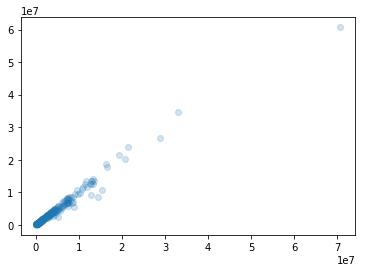

In [241]:
plt.scatter(y_valid,y_pred, alpha=.2);

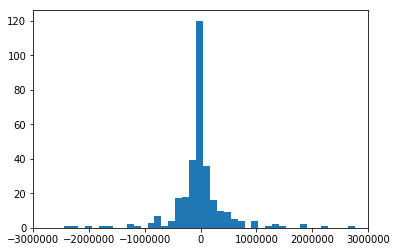

In [237]:
plt.hist((y_valid - y_pred), bins=100)
plt.xlim(-3000000, 3000000);

In [238]:
bid.columns

Index(['Proposal Number', 'date', 'Winning Bid 2017',
       'Engineers Estimate 2017', 'Changes 2017', 'Final cost 2017',
       'No of participants', 'Bid 2017 mean', 'Bid 2017 min', 'Bid 2017 max',
       'Spread', 'Excentricity 1', 'Excentricity 2'],
      dtype='object')

(-3000000, 3000000)

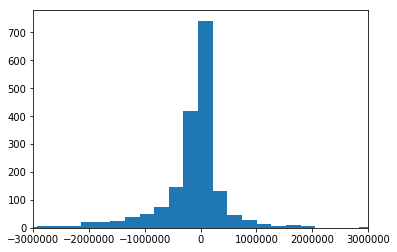

In [239]:
plt.hist((bid['Engineers Estimate 2017'] - bid['Final cost 2017']), bins=100);
plt.xlim(-3000000, 3000000)

In [240]:
mod.coef_, mod.intercept_

(array([1.05272982e+00, 4.83019232e-02, 1.17106006e-02, 2.06664538e+04]),
 array([-52043.84389177]))

In [201]:
valid_cv_errors, train_cv_residuals

(array([14792050.77958063, 13837697.52069148, 18129448.9176615 ,
        14938155.70464385, 16718345.32230945]),
 array([1.15422642e+10, 1.17438593e+10, 1.16263581e+10, 1.17897974e+10,
        1.22918403e+10]))

In [80]:
X

,Engineers Estimate 2017,No of participants,Bid 2017 mean,Bid 2017 min,Bid 2017 max,Spread,Excentricity 2
0,5.063e+06,5,5.307e+06,5.22e+06,5.87e+06,6.504e+05,0.733
1,1.87e+07,7,1.881e+07,1.862e+07,2.136e+07,2.736e+06,0.8674
2,1.772e+07,5,2.282e+07,2.183e+07,3.02e+07,8.37e+06,0.7631
3,2.287e+07,4,2.369e+07,2.221e+07,3.412e+07,1.192e+07,0.7501
4,6.642e+06,3,6.832e+06,6.624e+06,7.382e+06,7.579e+05,0.452
5,7.547e+06,4,7.509e+06,7.357e+06,8.332e+06,9.751e+05,0.6892
6,3.226e+06,4,4.864e+06,4.724e+06,5.88e+06,1.156e+06,0.7581
7,4.881e+07,5,4.495e+07,4.373e+07,5.439e+07,1.066e+07,0.7721
8,2.143e+06,9,2.053e+06,2.019e+06,2.834e+06,8.146e+05,0.9171
9,2.011e+06,11,2.115e+06,2.052e+06,3.07e+06,1.018e+06,0.8767


In [46]:
y_pred.values.shape

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [48]:
y_valid.values.reshape(y_pred.shape).shape


(314,)

In [35]:
type(valid_cv_errors)

numpy.ndarray

In [36]:
valid_cv_errors.append(3.3)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

### Model 2: Knowing the winner

In [ ]:
X = bid[[ 'Winning Bid 2017', 'Engineers Estimate 2017', 'No of participants', 
        'Bid 2017 mean', 'Bid 2017 min', 'Bid 2017 max', 'Spread', 
        'Excentricity 1', 'Excentricity 2']]

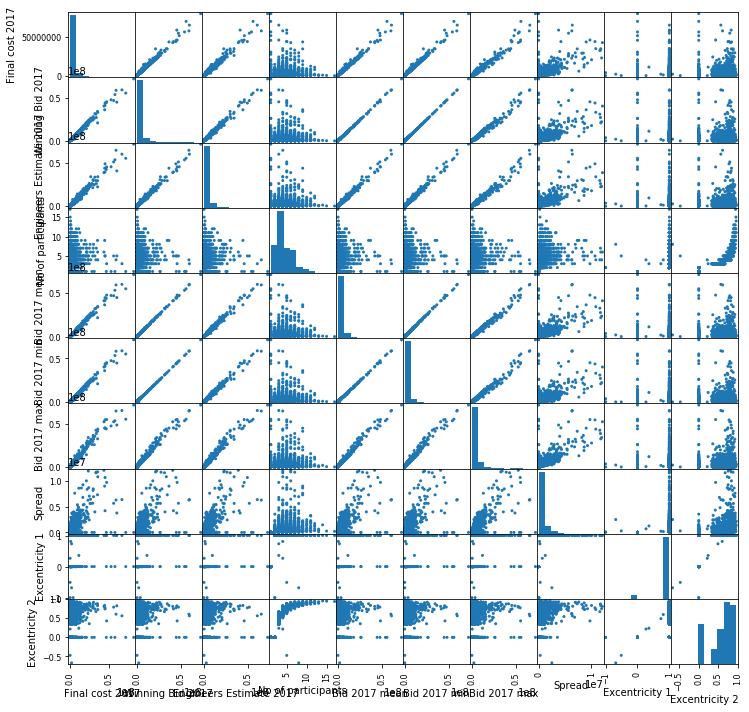

In [10]:
pd.plotting.scatter_matrix(X1, figsize=(12,12), alpha=1);

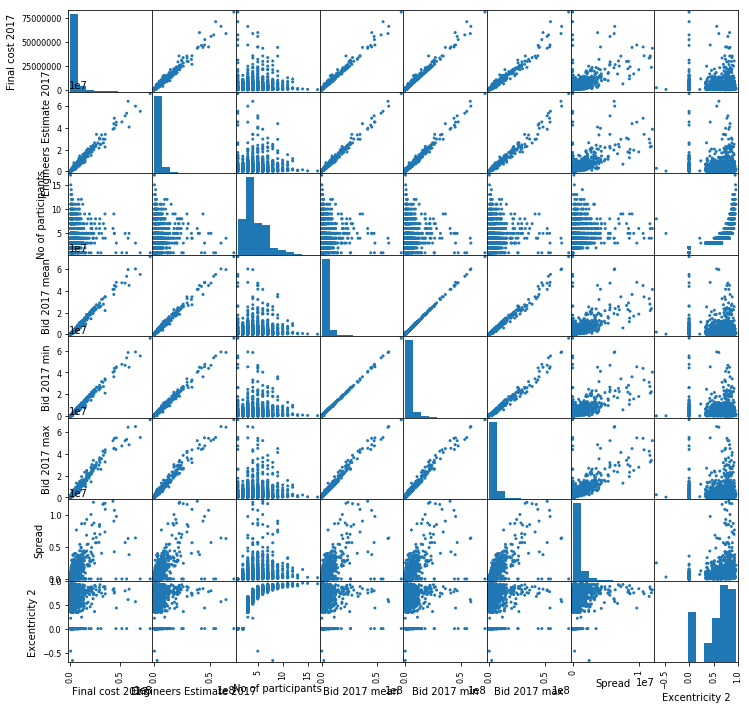

In [11]:
pd.plotting.scatter_matrix(X2, figsize=(12,12), alpha=1);

In [12]:
X2 = bid[['No of participants', 'Bid 2017 mean',
          'Bid 2017 min', 'Bid 2017 max', 'Spread', 'Excentricity 2']]

In [13]:
bid.columns

Index(['Proposal Number', 'date', 'Winning Bid 2017',
       'Engineers Estimate 2017', 'Changes 2017', 'Final cost 2017',
       'No of participants', 'Bid 2017 mean', 'Bid 2017 min', 'Bid 2017 max',
       'Spread', 'Excentricity 1', 'Excentricity 2'],
      dtype='object')

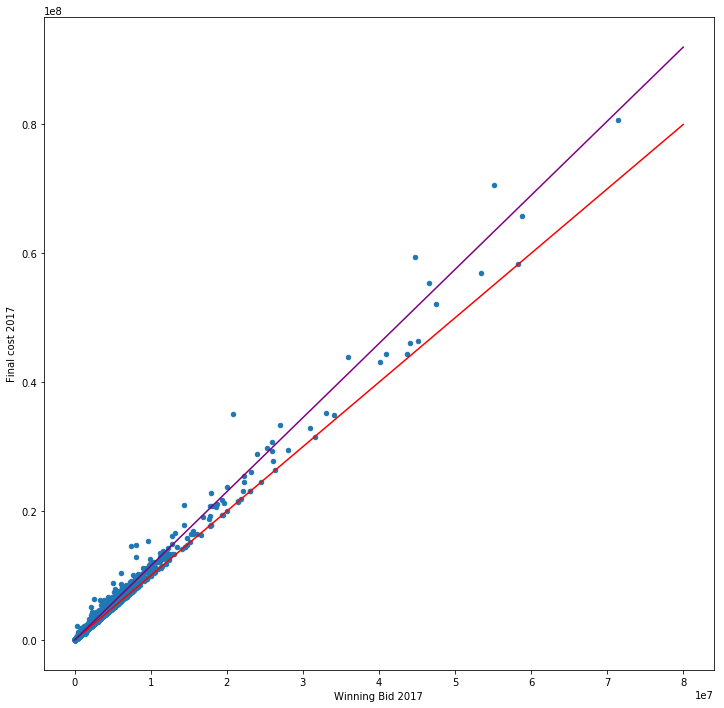

In [14]:
bid.plot.scatter('Winning Bid 2017', 'Final cost 2017', figsize=(12,12))
plt.plot([0, 80000000], [0, 80000000], c='red', alpha=1)
plt.plot([0, 80000000], [0, 80000000*1.15], c='purple', alpha=1)

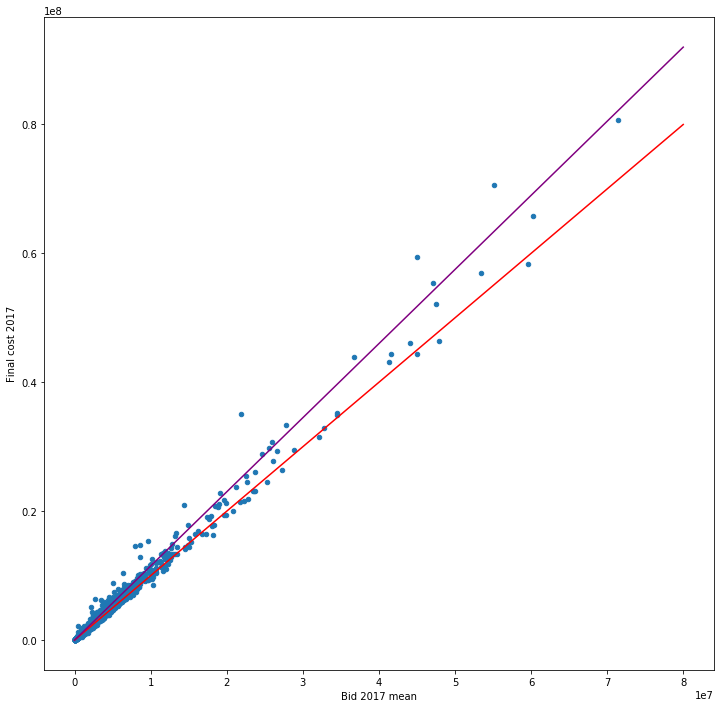

In [21]:
bid.plot.scatter('Bid 2017 mean', 'Final cost 2017', figsize=(12,12))
plt.plot([0, 80000000], [0, 80000000], c='red', alpha=1)
plt.plot([0, 80000000], [0, 80000000*1.15], c='purple', alpha=1);

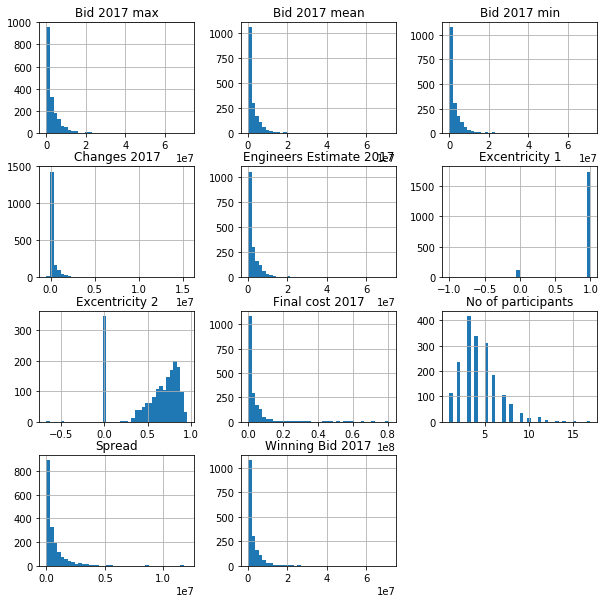

In [16]:
bid.hist(figsize=(10,10), bins=40);

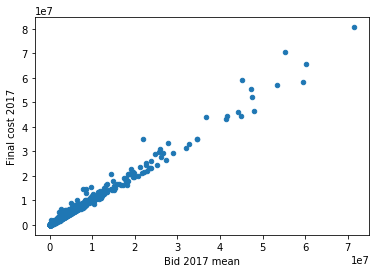

In [17]:
bid.plot.scatter('Bid 2017 mean', 'Final cost 2017' );



In [18]:
toy = bid

In [19]:
toy[toy['No of participants'] == 1]

,Proposal Number,date,Winning Bid 2017,Engineers Estimate 2017,Changes 2017,Final cost 2017,No of participants,Bid 2017 mean,Bid 2017 min,Bid 2017 max,Spread,Excentricity 1,Excentricity 2
27,C13970T-ALT A,2005-04-01,1.450677e+07,1.487849e+07,0.000000e+00,1.450677e+07,1.0,1.450677e+07,1.450677e+07,1.450677e+07,0.0,0.0,0.0
28,C13970T-ALT B,2005-04-01,1.151576e+07,1.176932e+07,0.000000e+00,1.151576e+07,1.0,1.151576e+07,1.151576e+07,1.151576e+07,0.0,0.0,0.0
101,C14978,2005-05-01,4.120109e+06,4.488449e+06,0.000000e+00,4.120109e+06,1.0,4.120109e+06,4.120109e+06,4.120109e+06,0.0,0.0,0.0
116,C15033,2005-03-01,1.360221e+06,1.333272e+06,0.000000e+00,1.360221e+06,1.0,1.360221e+06,1.360221e+06,1.360221e+06,0.0,0.0,0.0
126,C15064R,2005-09-01,6.574853e+05,6.647991e+05,0.000000e+00,6.574853e+05,1.0,6.574853e+05,6.574853e+05,6.574853e+05,0.0,0.0,0.0
129,C15067RB,2006-03-01,5.069453e+06,4.865005e+06,0.000000e+00,5.069453e+06,1.0,5.069453e+06,5.069453e+06,5.069453e+06,0.0,0.0,0.0
131,C15070R,2005-08-01,8.520971e+05,7.582218e+05,0.000000e+00,8.520971e+05,1.0,8.520971e+05,8.520971e+05,8.520971e+05,0.0,0.0,0.0
140,C15107R,2006-06-01,1.687168e+06,1.745479e+06,0.000000e+00,1.687168e+06,1.0,1.687168e+06,1.687168e+06,1.687168e+06,0.0,0.0,0.0
154,C15150,2005-12-01,2.903058e+06,2.658697e+06,0.000000e+00,2.903058e+06,1.0,2.903058e+06,2.903058e+06,2.903058e+06,0.0,0.0,0.0
166,C15174,2005-07-01,3.428382e+06,2.954313e+06,0.000000e+00,3.428382e+06,1.0,3.428382e+06,3.428382e+06,3.428382e+06,0.0,0.0,0.0


In [20]:
toy['Loser Bid 2017 mean'] = np.where((toy['No of participants'] == 1), 
                                      toy['Winning Bid 2017'], 
                                      toy['Loser Bid 2017 mean'])

KeyError: 'Loser Bid 2017 mean'

In [ ]:
toy.head(60)

In [ ]:
type(bid['Final cost 2017'].values)

In [ ]:
bid['Loser Bid 2017 mean'] += bid[bid['No of participants'] == 1]['Winning Bid 2017']

In [ ]:
bid.head(500)